In [310]:
import matplotlib.pyplot as plt
import csv

data = []


b = True
with open('eruptions.csv') as f:
    plots = csv.reader(f, delimiter=';')
    for row in plots:
        point = [0,0]
        if b:
            a = (row[0].split('¿')[1])
            point[0] = float(a)
            point[1] = float(row[1])
            data.append(point)
            b = False
        else:
            point[0] = float(row[0])
            point[1] = float(row[1])
            data.append(point)

#plt.plot(x, y, 'go')
#plt.title('Eruptions and waiting time')
#plt.xlabel('Eruptions')
#plt.ylabel('Waiting')

#plt.show()

In [311]:
import numpy as np
import scipy.stats
from random import random
from scipy.stats import multivariate_normal

import numpy as np
import scipy.stats
from random import random
from scipy.stats import multivariate_normal

cov1 = [[15,4], [4, 15]]
mean1 = [10, 10]
pi1 = 0.4
cov2 = [[9,1], [1, 9]]
mean2 = [20, 20]
pi2 = 0.6
# Number of repetions, termination condition
numberOfRepetitions = 10

-----------
Cluster #1:
cov1:
[[9.36421646e+15 1.55126935e+17]
 [1.55126935e+17 2.56982162e+18]]
mean1:
[6.73426424e-05 1.46593174e-03]
-----------
Cluster #2:
cov2:
[[ 0.07336062  1.21528677]
 [ 1.21528677 20.1323531 ]]
mean2:
[3.99523267e-06 9.85259924e-05]


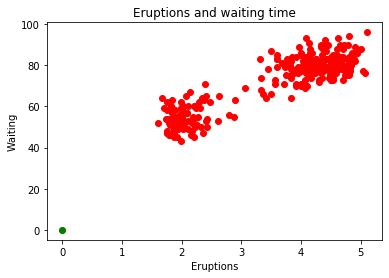

In [312]:
while numberOfRepetitions > 0:
    
    #-------------------------------------------------------------------------
    #------------------------ E STEP -----------------------------------------
    #-------------------------------------------------------------------------
   
    x = np.array(data)
    
    a1 = np.multiply(multivariate_normal.pdf(x, mean=mean1, cov=cov1,allow_singular=True),pi1)
    
    a2 = np.multiply(multivariate_normal.pdf(x, mean=mean2, cov=cov2,allow_singular=True),pi2)
    
    a3 = np.add(a1, a2)
    
    gammas1 = np.divide(a1, a3)
    gammas2 = np.divide(a2, a3)
   
    #-------------------------------------------------------------------------
    #------------------------ M STEP -----------------------------------------
    #-------------------------------------------------------------------------
    
    addedGammas1 = np.sum(gammas1, axis = 0)
    addedGammas2 = np.sum(gammas2, axis = 0)
    
    #new pies
    pi1 = addedGammas1/gammas1.shape[0]
    pi2 = addedGammas2/gammas2.shape[0]
    
    c1 = np.diag(a1)
    c2 = np.diag(a2)

    #new means
    mean1 = np.sum(np.dot(c1,x1), axis=0)
    mean2 = np.sum(np.dot(c2,x2), axis=0)
    
    mean1 = np.divide(mean1, addedGammas1)
    mean2 = np.divide(mean2, addedGammas2)
    
    matrix1 = 0
    matrix2 = 0
    
    for i in range(x.shape[0]):
        
        vector1 = np.array((x[i]))
        matrix1 =  vector1.reshape(-1,1) @ vector1.reshape(1,2)
        matrixMu1 = np.multiply(matrix1, a1[i])
        matrix1 = np.add(matrix1, matrixMu1)
                  
        vector2 = np.array((x[i]))
        matrix2 =  vector2.reshape(-1,1) @ vector2.reshape(1,2)
        matrixMu2 = np.multiply(matrix2, a2[i])
        matrix2 = np.add(matrix2, matrixMu2)
                         
        
    cov1 = np.divide(matrix1, addedGammas1)
    cov2 = np.divide(matrix2, addedGammas2)
        
    #decrease repetitions
    numberOfRepetitions -= 1
    
print('-----------')
print('Cluster #1:')
print('cov1:')
print(cov1)
print('mean1:')
print(mean1)
print('-----------')
print('Cluster #2:')
print('cov2:')
print(cov2)
print('mean2:')
print(mean2)
#Graph:
for point in range(len(x)):
    if a1[point]<=a2[point]:
        plt.plot(x[point][0], x[point][1], "or")
    else: 
        plt.plot(x[point][0], x[point][1], "ob")
plt.plot(mean1[0], mean1[1], "oy")
plt.plot(mean2[0], mean2[1], "og")
plt.title('Eruptions and waiting time')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.show()
                         
